In [23]:
#Check and install these packages if there aren't installed in your environment

pip install pandas
pip install seaborn
pip install -U matplotlib
pip install -U scikit-learn
pip install Flask

SyntaxError: invalid syntax (3654543829.py, line 3)

In [16]:
import pandas as pd

# Load dataset
data = pd.read_csv('dataset.csv')


In [17]:
print(data)

     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         M   65        1               1        1              2   
1         F   55        1               2        2              1   
2         F   78        2               2        1              1   
3         M   60        2               1        1              1   
4         F   80        1               1        2              1   
...     ...  ...      ...             ...      ...            ...   
2995      F   71        2               1        1              2   
2996      F   75        1               2        1              1   
2997      F   62        2               2        2              1   
2998      M   30        1               1        2              2   
2999      M   40        1               2        2              1   

      CHRONIC_DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL_CONSUMING  \
0                   2        1        2         2                  2   
1                   1      

In [18]:
# Display the first few rows of the dataset
print(data.head())

# Display summary statistics
print(data.describe())

# Display information about the dataset
print(data.info())

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   65        1               1        1              2   
1      F   55        1               2        2              1   
2      F   78        2               2        1              1   
3      M   60        2               1        1              1   
4      F   80        1               1        2              1   

   CHRONIC_DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL_CONSUMING  COUGHING  \
0                2        1        2         2                  2         2   
1                1        2        2         2                  1         1   
2                1        2        1         2                  1         1   
3                2        1        2         1                  1         2   
4                1        2        1         2                  1         1   

   SHORTNESS_OF_BREATH  SWALLOWING_DIFFICULTY  CHEST_PAIN LUNG_CANCER  
0                    2                      2           

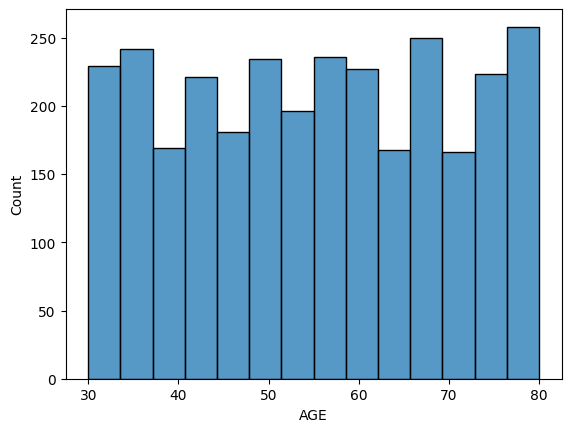

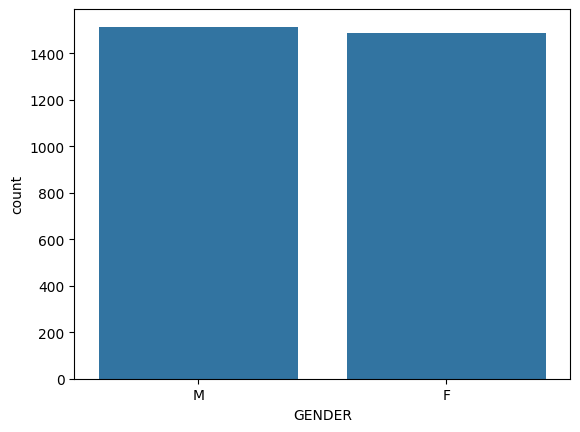

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of age
sns.histplot(data['AGE'])
plt.show()

# Plot distribution of gender
sns.countplot(x='GENDER', data=data)
plt.show()


In [20]:
# Check for missing values
print(data.isnull().sum())

# Drop or fill missing values
data = data.dropna()  # Example: Drop rows with missing values


GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64


In [21]:
from sklearn.preprocessing import LabelEncoder

# Encode 'GENDER' column
label_encoder = LabelEncoder()
data['GENDER'] = label_encoder.fit_transform(data['GENDER'])

# Encode 'LUNG_CANCER' column (assuming it has binary values like 'YES'/'NO')
data['LUNG_CANCER'] = label_encoder.fit_transform(data['LUNG_CANCER'])



In [22]:
from sklearn.preprocessing import StandardScaler

# Identify numerical features
numerical_features = ['AGE']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])


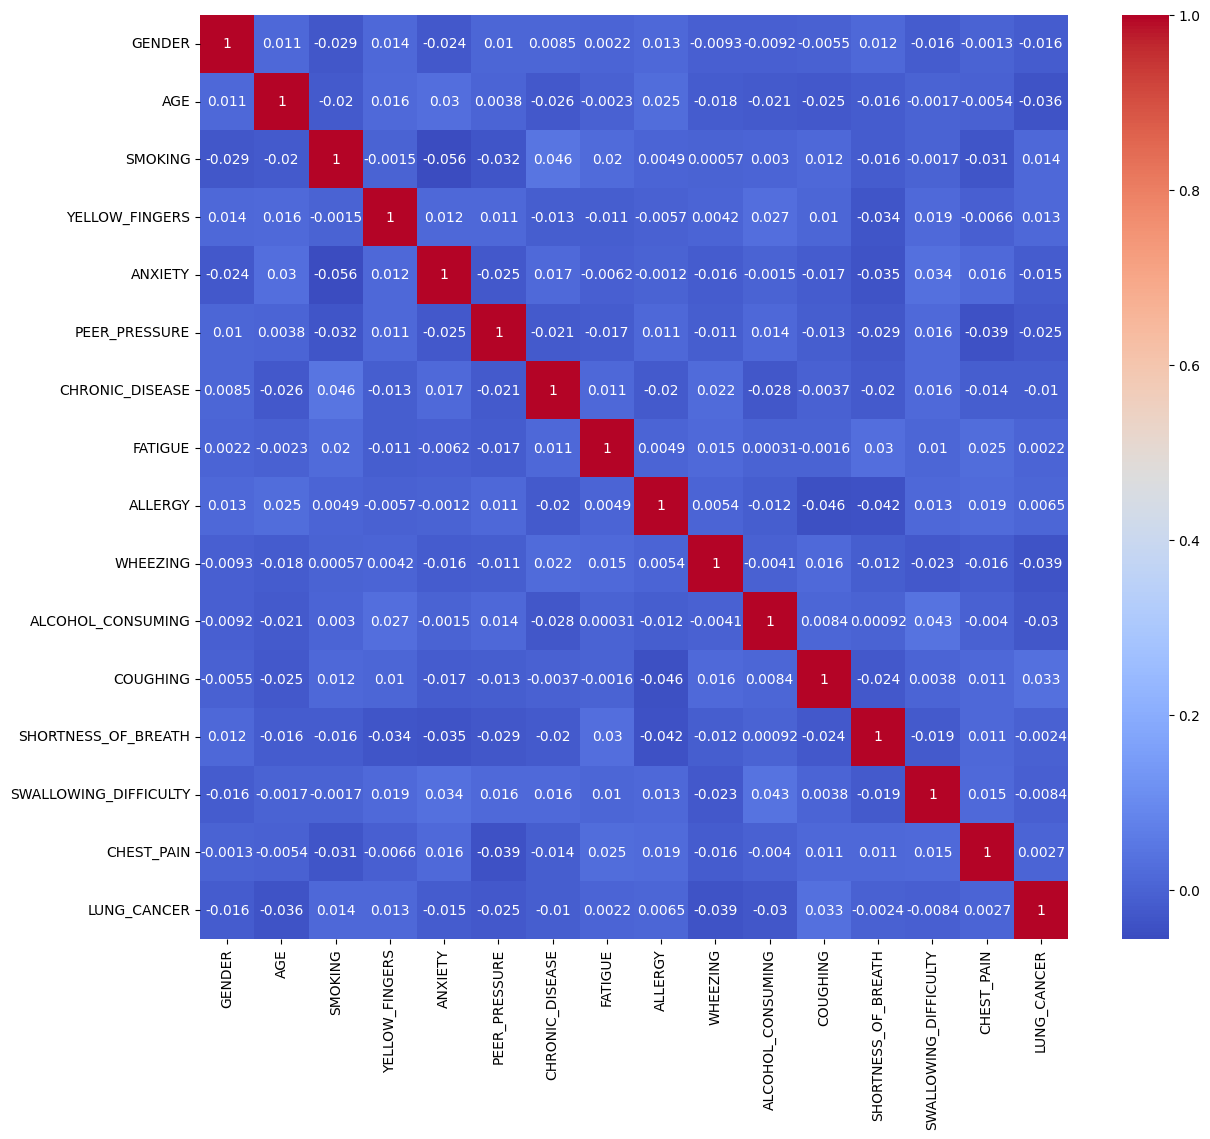

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [24]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier()

# Fit the model
model.fit(data.drop('LUNG_CANCER', axis=1), data['LUNG_CANCER'])

# Get feature importances
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=data.drop('LUNG_CANCER', axis=1).columns)
print(feature_importance.sort_values(ascending=False))


AGE                      0.312494
CHEST_PAIN               0.053803
FATIGUE                  0.052322
SWALLOWING_DIFFICULTY    0.051633
SMOKING                  0.051241
ALLERGY                  0.050919
YELLOW_FINGERS           0.050891
CHRONIC_DISEASE          0.050323
ANXIETY                  0.049996
GENDER                   0.049828
SHORTNESS_OF_BREATH      0.048017
PEER_PRESSURE            0.047381
COUGHING                 0.046854
ALCOHOL_CONSUMING        0.045021
WHEEZING                 0.039278
dtype: float64


In [25]:
from sklearn.model_selection import train_test_split

X = data.drop('LUNG_CANCER', axis=1)
y = data['LUNG_CANCER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
Lungmodel = LogisticRegression()

# Train the model
Lungmodel.fit(X_train, y_train)


LogisticRegression()

In [27]:
y_pred = Lungmodel.predict(X_test)


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))


Accuracy: 0.5216666666666666
Precision: 0.5167173252279635
Recall: 0.5704697986577181
F1 Score: 0.5422647527910686


In [29]:
import pickle
pickle.dump(Lungmodel,open('lung_cancer_model.pkl','wb'))
model=pickle.load(open('lung_cancer_model.pkl','rb'))


